In [2]:
#Import libraries
import numpy as np
import scipy as sp
import pandas as pd

#Import graphing libraries and settings
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%pylab inline

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)



#Set display options to display all data
pd.set_option('display.max_columns', 1000000)
pd.set_option('display.max_rows', 1000000)

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Import csv and fill Na values 
data = pd.read_csv('Amazon.csv')
print(data.shape)
data.Summary = data.Summary.fillna('0')
data.ProfileName = data.ProfileName.fillna(' ')

(455000, 13)


In [4]:
#Create columns stating number of reviews written pre user, and per product
data['UserCounts'] = data.groupby('UserId')['UserId'].transform('count')
data['ProductCounts'] = data.groupby('ProductId')['ProductId'].transform('count')
data['Time'] = pd.to_datetime(data['Time'],unit='s')

In [5]:
#########VVV Visualizing data shape to attempt identifying clusters #####VVV


In [6]:
# Create DF sorted by amount of reviews written per user
dataSortedUser = data.sort_values(by="UserCounts")
#weirdSortedUser = weirdData.sort_values(by="UserCounts")

In [7]:
# Create DF sorted by amount of reviews written per user
dataSortedProduct = data.sort_values(by="ProductCounts")
#weirdSortedProduct = weirdData.sort_values(by="ProductCounts")

In [8]:
#Create DF with both duplicate User and Products dropped
ddupeAll = data.drop_duplicates("UserId")
ddupeAll = ddupeAll.drop_duplicates("ProductId")

In [9]:
ddupeAll_SortedUser = ddupeAll.sort_values(by="UserCounts")
ddupeAll_SortedProduct = ddupeAll.sort_values(by="ProductCounts")

In [10]:
#Scatter plots VVV
pylab.rcParams['figure.figsize'] = (20, 14)  #increase size of plots

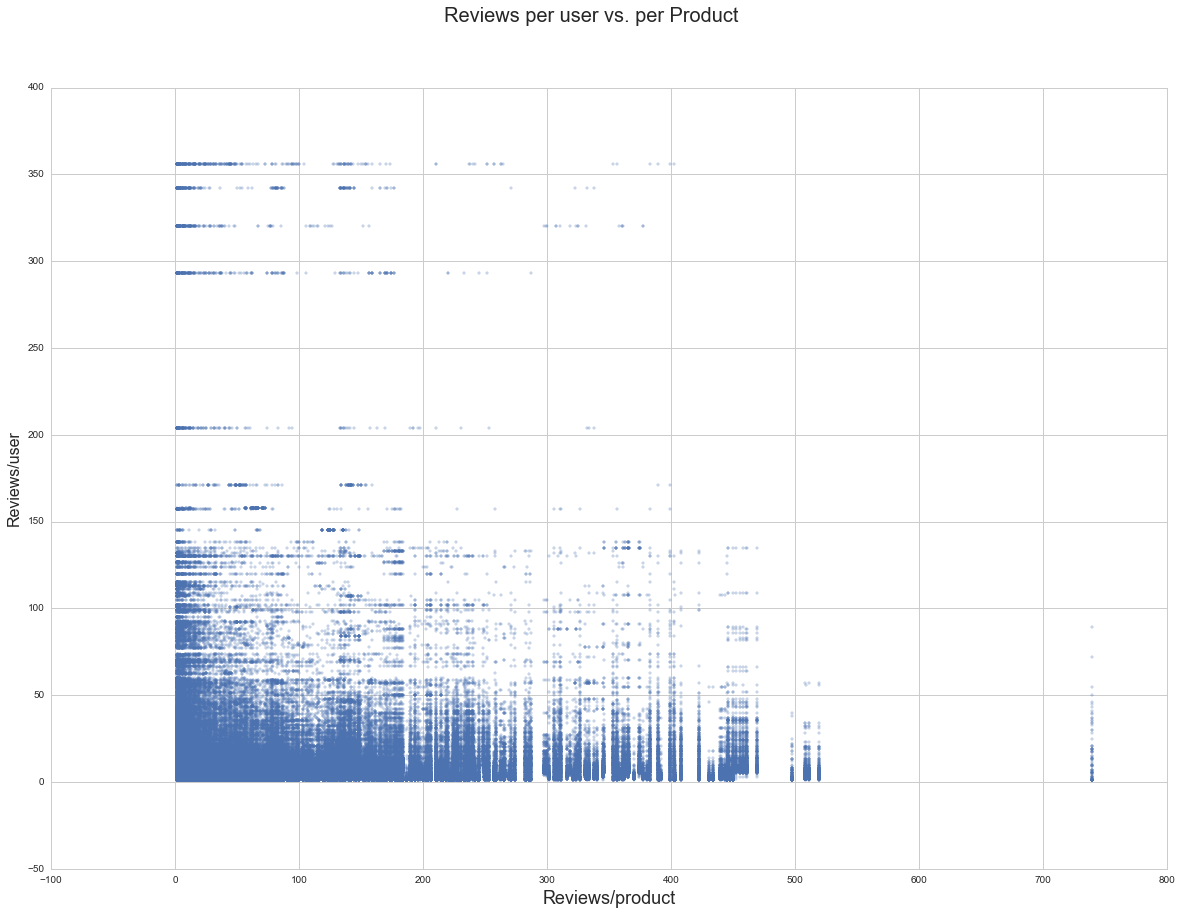

In [11]:
fig = plt.figure()
plt.scatter(data.ProductCounts, data.UserCounts, marker='+')
fig.suptitle('Reviews per user vs. per Product', fontsize=20)
plt.xlabel('Reviews/product', fontsize=18)
plt.ylabel('Reviews/user', fontsize=16)

In [12]:
#Set Colors

light_rgba_colors = np.zeros((1,4))
light_rgba_colors[:,2] = 0.8
light_rgba_colors[:,1] = 0.3
light_rgba_colors[:,0] = 0.2
light_rgba_colors[:,3] = 0.1



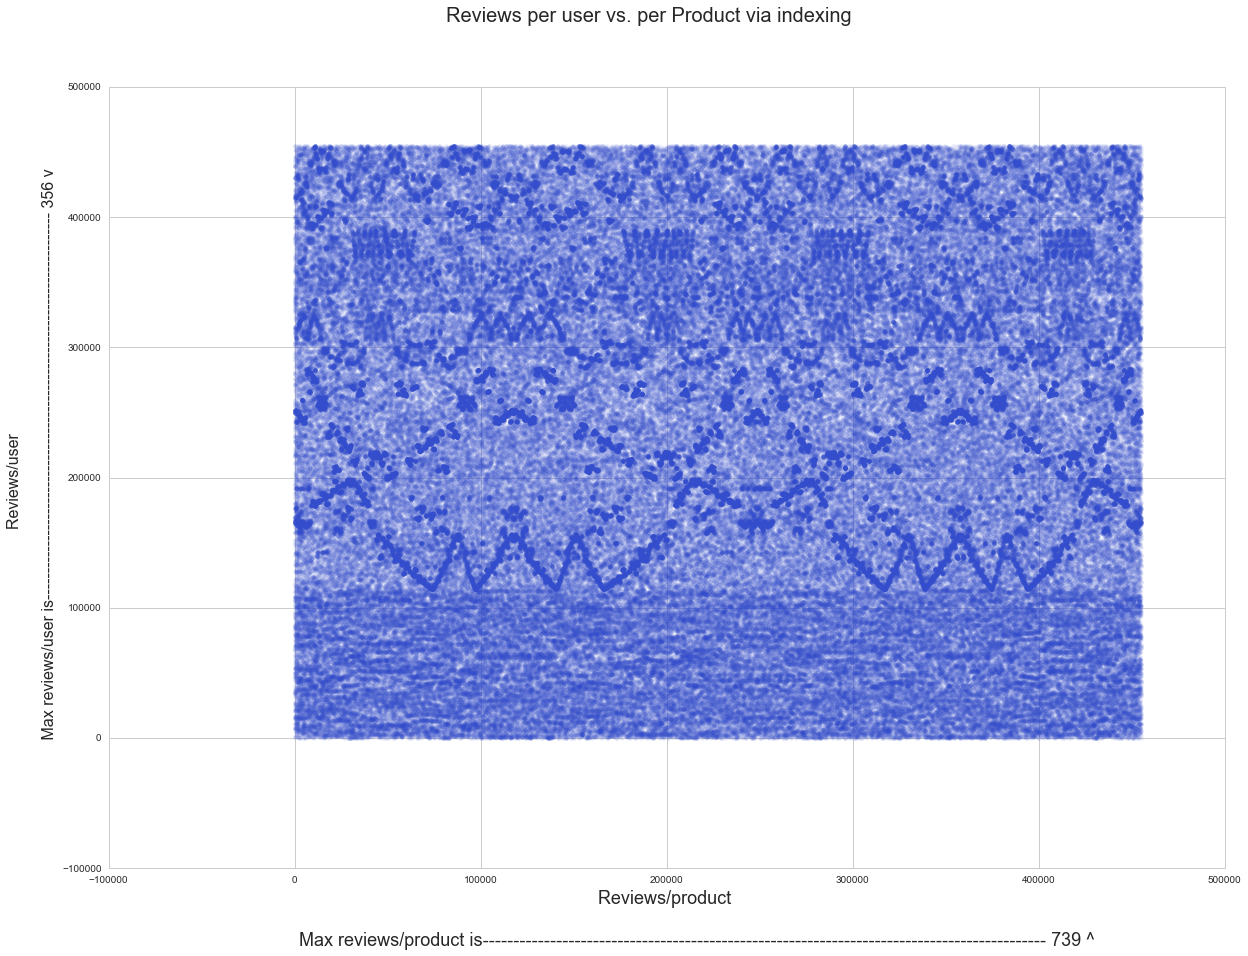

In [13]:
fig = plt.figure()

plt.scatter(dataSortedProduct.index, dataSortedUser.index, marker='o', c=light_rgba_colors, lw=0)
fig.suptitle('Reviews per user vs. per Product via indexing', fontsize=20)
plt.xlabel('Reviews/product \n\n' + "            Max reviews/product is-------------------------------------------------------------------------------------------- %d ^"%(data.ProductCounts .max()), fontsize=18)
plt.ylabel('Reviews/user \n\n' + "           Max reviews/user is------------------------------------------------------------------------ %d v"%(data.UserCounts.max()), fontsize=16)


In [14]:
#Trying with dduped data VVV
dark_rgba_colors = np.zeros((1,4))
dark_rgba_colors[:,2] = 0.5
dark_rgba_colors[:,1] = 0.3
dark_rgba_colors[:,0] = 0.2
dark_rgba_colors[:,3] = 0.25

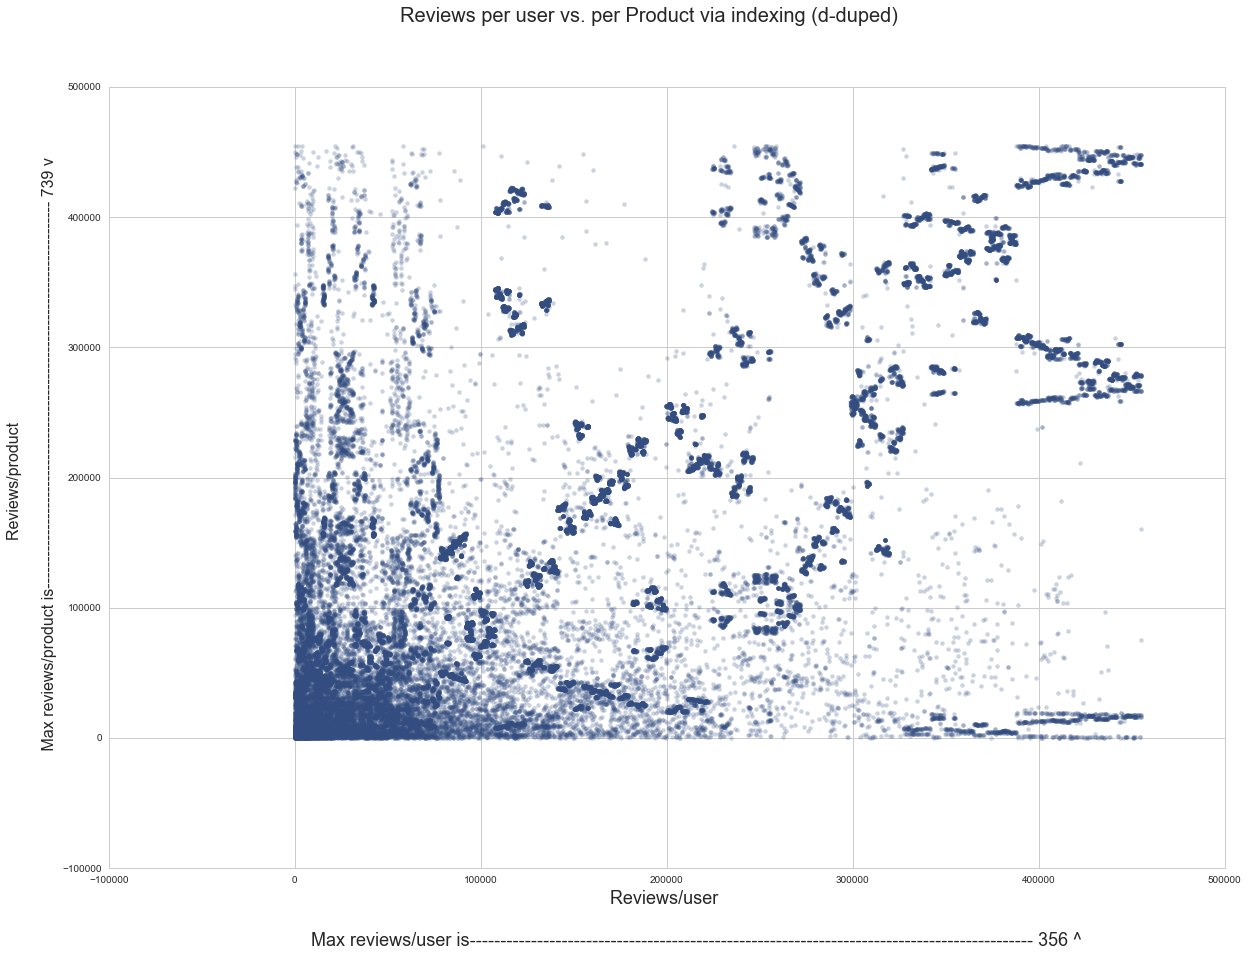

In [15]:
fig = plt.figure()

plt.scatter(ddupeAll_SortedUser.index, ddupeAll_SortedProduct.index, marker='o', c=dark_rgba_colors, lw=0)
fig.suptitle('Reviews per user vs. per Product via indexing (d-duped)', fontsize=20)
plt.xlabel('Reviews/user \n\n' + "            Max reviews/user is-------------------------------------------------------------------------------------------- %d ^"%(data.UserCounts.max()), fontsize=18)
plt.ylabel('Reviews/product \n\n' + "           Max reviews/product is------------------------------------------------------------------------ %d v"%(data.ProductCounts.max()), fontsize=16)

print()

In [16]:
#Create DF with duplicate Products dropped, and sort.
ddupeProduct = data.drop_duplicates("ProductId")
ddupeProduct_SortUser = ddupeProduct.sort_values(by="UserCounts")
ddupeProduct_SortProduct = ddupeProduct.sort_values(by="ProductCounts")

In [17]:
#Create DF withduplicate Users dropped and sort.
ddupeUser = data.drop_duplicates("UserId")
ddupeUser_SortUser = ddupeUser.sort_values(by="UserCounts")
ddupeUser_SortProduct = ddupeUser.sort_values(by="ProductCounts")

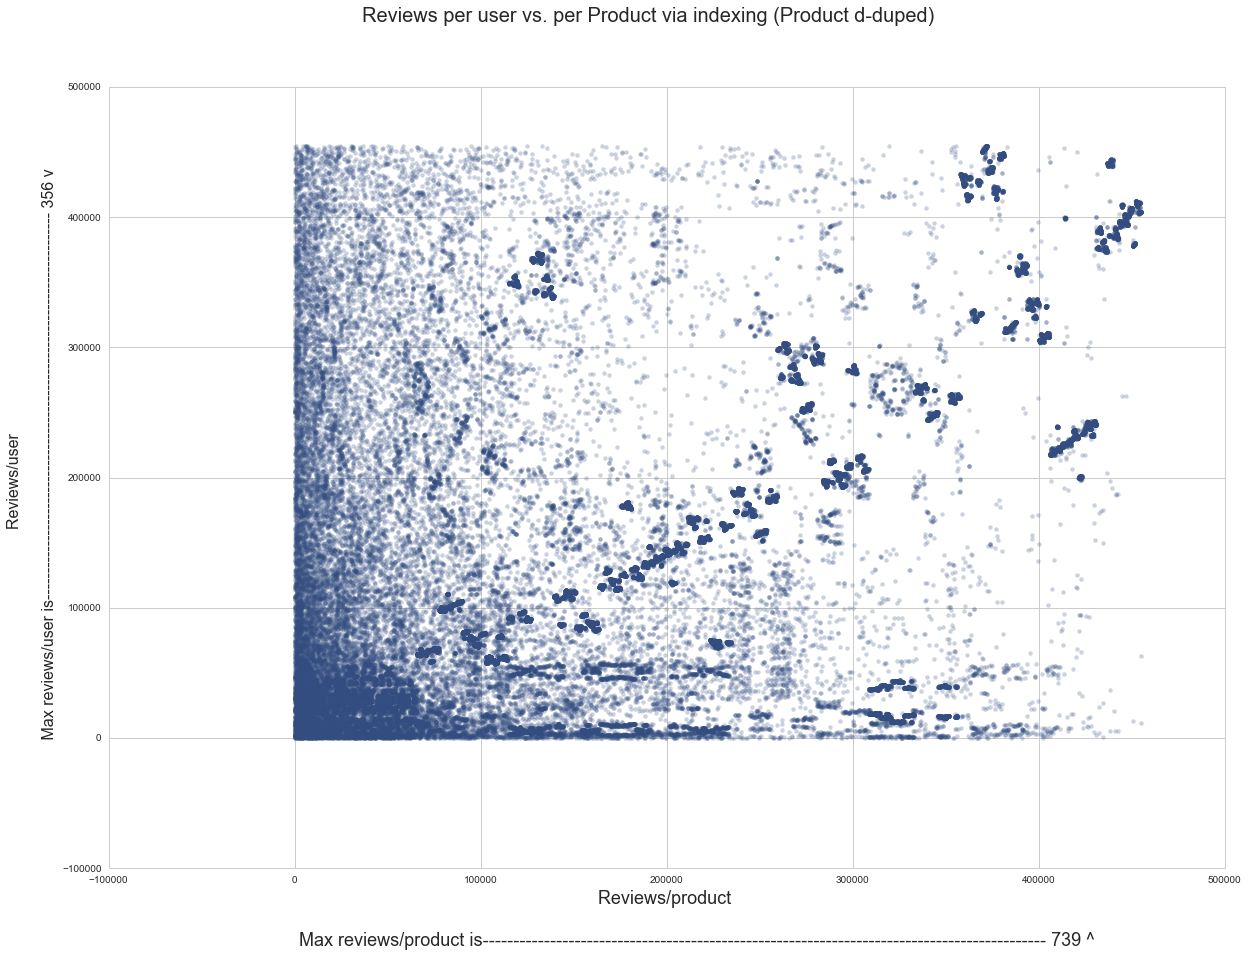

In [109]:
fig = plt.figure()

plt.scatter(ddupeProduct_SortProduct.index, ddupeProduct_SortUser.index, marker='o', c=dark_rgba_colors, lw=0)
fig.suptitle('Reviews per user vs. per Product via indexing (Product d-duped)', fontsize=20)
plt.xlabel('Reviews/product \n\n' + "            Max reviews/product is-------------------------------------------------------------------------------------------- %d ^"%(data.ProductCounts .max()), fontsize=18)
plt.ylabel('Reviews/user \n\n' + "           Max reviews/user is------------------------------------------------------------------------ %d v"%(data.UserCounts.max()), fontsize=16)

print()

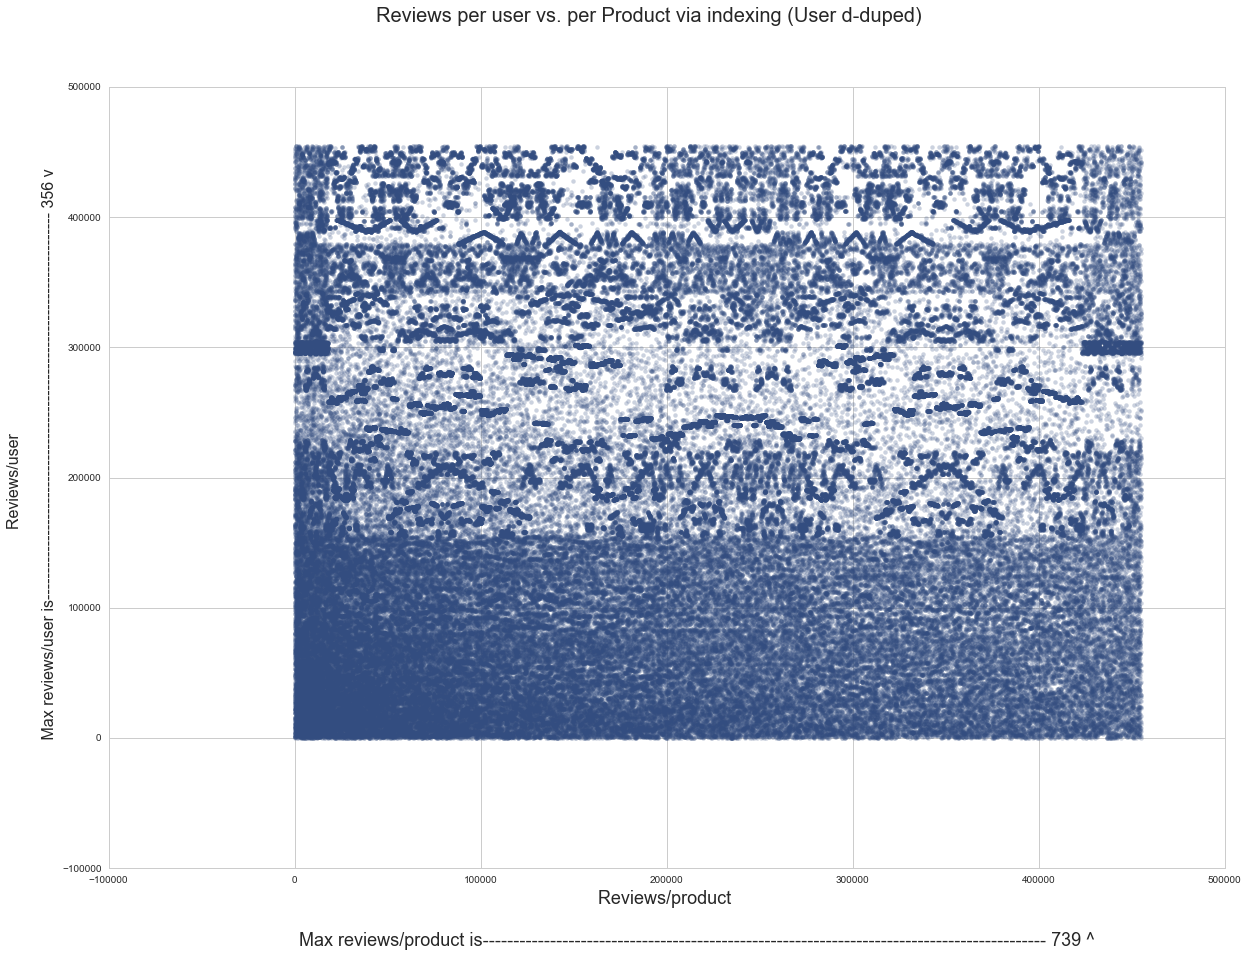

In [110]:
fig = plt.figure()

plt.scatter(ddupeUser_SortProduct.index, ddupeUser_SortUser.index,  marker='o', c=dark_rgba_colors, lw=0)
fig.suptitle('Reviews per user vs. per Product via indexing (User d-duped)', fontsize=20)
plt.xlabel('Reviews/product \n\n' + "            Max reviews/product is-------------------------------------------------------------------------------------------- %d ^"%(data.ProductCounts .max()), fontsize=18)
plt.ylabel('Reviews/user \n\n' + "           Max reviews/user is------------------------------------------------------------------------ %d v"%(data.UserCounts.max()), fontsize=16)

print()

In [111]:
####### 3d plots VVV 

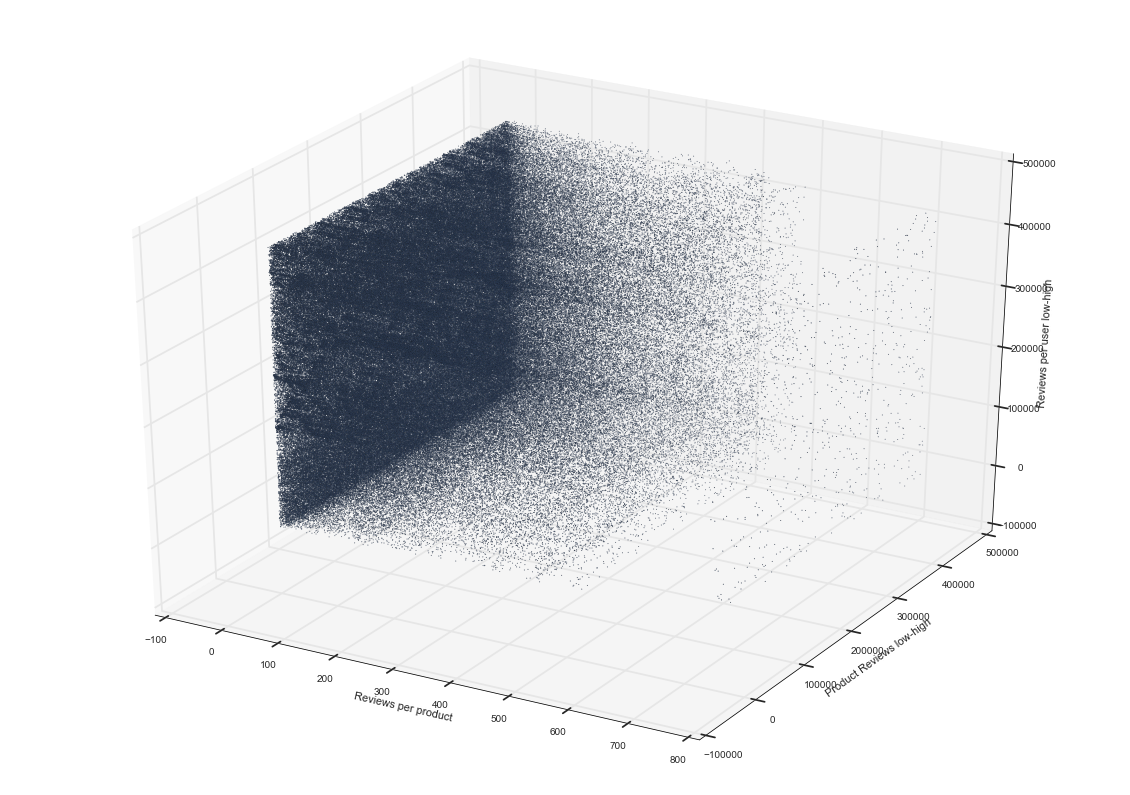

In [533]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter( data.ProductCounts, dataSortedProduct.index, dataSortedUser.index, s=0.5)# c=light_rgba_colors, marker='.', lw=0.05)
ax.set_xlabel('Reviews per product ')
ax.set_ylabel('Product Reviews low-high ')
ax.set_zlabel('Reviews per user low-high')

plt.show()

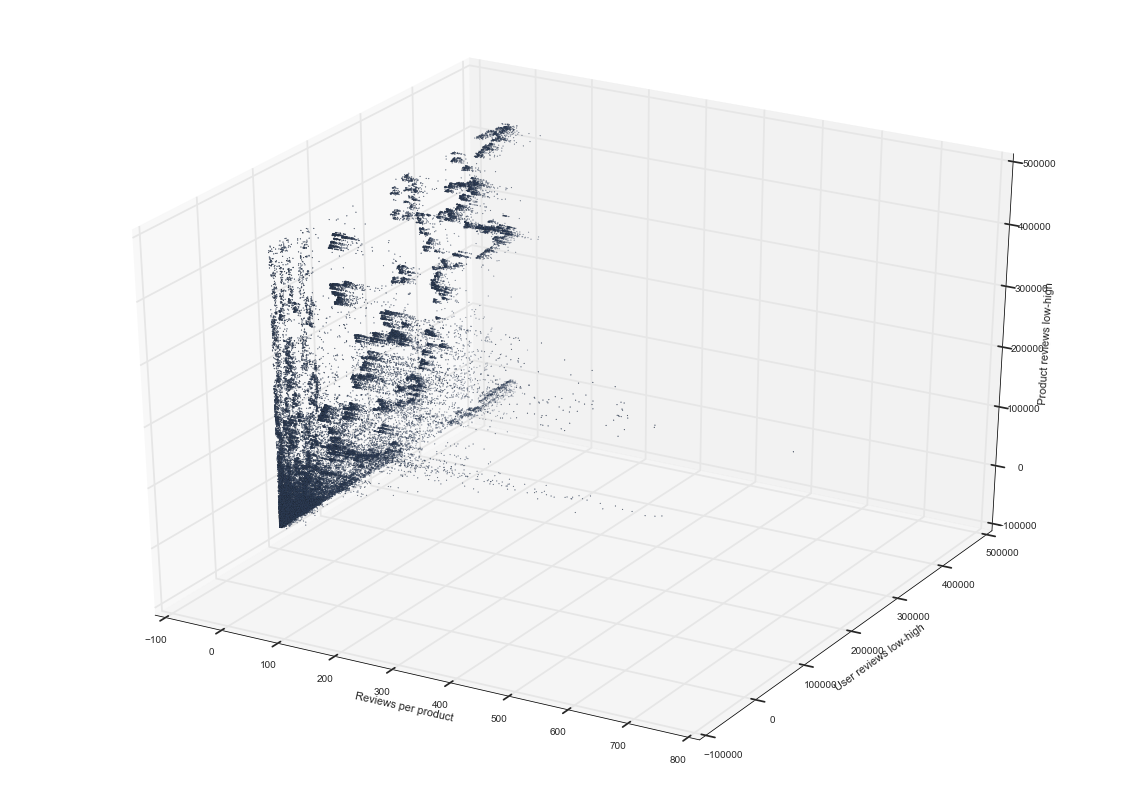

In [532]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter( ddupeAll.ProductCounts, ddupeAll_SortedUser.index, ddupeAll_SortedProduct.index,  s=0.5)# c=dark_rgba_colors, marker='o', lw=0.1)
ax.set_xlabel('Reviews per product')
ax.set_ylabel('User reviews low-high')
ax.set_zlabel('Product reviews low-high')

plt.show()

In [18]:
#grouping userIDs with their Products
product_by_pid = ddupeUser.groupby('ProductId')['UserId'].apply(lambda x: ' '.join(x)).reset_index()
product_by_pid.shape

(54120, 2)

In [19]:
#transform to matrix
uidArray = product_by_pid.UserId.as_matrix()
uidArray

array([ 'AK1L4EJBA23JF AZGXZ2UUK6X ABW4IC5G5G8B5 A3E9QZFE9KXH8J A2RTT81R6Y3R7X A3KKR87BJ0C595 AVFMJ50HNO21J A1IJKK6Q1GTEAY AMX0PJKV4PPNJ A2PTSM496CF40Z AJ46FKXOVC7NR AYZ0PR5QZROD1 A2IW4PEEKO2R0U AM1MNZMYMS7D8 ACITT7DI6IDDL A1S4A3IQ2MU7V4 A2P4F2UO0UMP8C AGQWHPNDZGUD0 ADBFSA9KTQANE A12HY5OZ2QNK4N A2QXYSXGQ2PKAU A1C9K534BCI9GO A3E7R866M94L0C A2ONB6ZA292PA A2QID6VCFTY51R A1HKYQOFC8ZZCH A3RMCRB2NDTDYP AQEYF1AXARWJZ A3CMRKGE0P909G',
       'AB1A5EGHHVA9M', 'A1C298ITT645B6 A13ISQV0U9GZIC', ...,
       'A1L0GWGRK4BYPT', 'A32A6X5KCP7ARG', 'AMP7K1O84DH1T'], dtype=object)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()

In [21]:
#Count Vectorize
userFeatures = count.fit_transform(uidArray)
userFeatures.shape

(54120, 219462)

In [22]:
#Fit to Kmeans
from sklearn.cluster import KMeans

km = KMeans(n_clusters=13)
km.fit(userFeatures)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=13, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [25]:
#Re-format
convert_km = pd.DataFrame(km.labels_)
results = pd.concat([product_by_pid, convert_km], axis=1, ignore_index=True)
results.columns = ['ProductId', 'UserIds', 'cluster']
clusters = pd.merge(results, ddupeUser, how='left', on='ProductId')
cluster_results = clusters.Summary.groupby(clusters.cluster)

In [26]:
#Show clustering results
clusters.cluster.value_counts()

0     217659
6        993
3        188
1        138
5        110
10        97
12        89
2         58
9         36
11        32
4         22
7         21
8         18
Name: cluster, dtype: int64

In [31]:
#splitting up clusters for analyzing
#(I'm sure there is a better way to do this xD)
cluster0 = clusters.loc[clusters['cluster'] == 0]
cluster1 = clusters.loc[clusters['cluster'] == 1]
cluster2 = clusters.loc[clusters['cluster'] == 2]
cluster3 = clusters.loc[clusters['cluster'] == 3]
cluster4 = clusters.loc[clusters['cluster'] == 4]
cluster5 = clusters.loc[clusters['cluster'] == 5]
cluster6 = clusters.loc[clusters['cluster'] == 6]
cluster7 = clusters.loc[clusters['cluster'] == 7]
cluster8 = clusters.loc[clusters['cluster'] == 8]
cluster9 = clusters.loc[clusters['cluster'] == 9]
cluster10 = clusters.loc[clusters['cluster'] == 10]
cluster11 = clusters.loc[clusters['cluster'] == 11]
cluster12 = clusters.loc[clusters['cluster'] == 12]
#cluster13 = clusters.loc[clusters['cluster'] == 13]
# cluster14 = clusters.loc[clusters['cluster'] == 14]
# cluster15 = clusters.loc[clusters['cluster'] == 15]
# cluster16 = clusters.loc[clusters['cluster'] == 16]
# cluster17 = clusters.loc[clusters['cluster'] == 17]
# cluster18 = clusters.loc[clusters['cluster'] == 18]
# cluster19 = clusters.loc[clusters['cluster'] == 19]
# cluster20 = clusters.loc[clusters['cluster'] == 20]
# cluster21 = clusters.loc[clusters['cluster'] == 21]
# cluster22 = clusters.loc[clusters['cluster'] == 22]
# cluster23 = clusters.loc[clusters['cluster'] == 23]
# cluster24 = clusters.loc[clusters['cluster'] == 24]
# cluster25 = clusters.loc[clusters['cluster'] == 25]


In [32]:
# set options to show more data
pd.set_option('max_colwidth',100)

In [56]:
cluster0.Score.value_counts()
cluster1.Score.value_counts()
cluster2.Score.value_counts()
cluster3.Score.value_counts()
cluster4.Score.value_counts()
# cluster5.Score.value_counts()
# cluster6.Score.value_counts()
# cluster7.Score.value_counts()
# cluster8.Score.value_counts()
# cluster9.Score.value_counts()
# cluster10.Score.value_counts()
# cluster11.Score.value_counts()
# cluster12.Score.value_counts()


5    73
4    27
1    19
2    11
3     8
Name: Score, dtype: int64

In [57]:
cluster0.UserCounts.value_counts()
cluster1.UserCounts.value_counts()
cluster2.UserCounts.value_counts()
cluster3.UserCounts.value_counts()
cluster4.UserCounts.value_counts()
cluster5.UserCounts.value_counts()
cluster6.UserCounts.value_counts()
# cluster7.UserCounts.value_counts()
# cluster8.UserCounts.value_counts()
# cluster9.UserCounts.value_counts()
# cluster10.UserCounts.value_counts()
# cluster11.UserCounts.value_counts()
# cluster12.UserCounts.value_counts()


2      465
1      325
3       94
4       31
5       13
6        9
7        8
19       7
8        7
9        7
10       5
11       3
13       3
17       3
12       2
18       2
51       1
14       1
21       1
22       1
26       1
35       1
40       1
46       1
135      1
Name: UserCounts, dtype: int64

In [45]:

cluster0.ProductCounts.value_counts()
cluster1.ProductCounts.value_counts()
cluster2.ProductCounts.value_counts()
cluster3.ProductCounts.value_counts()
cluster4.ProductCounts.value_counts()
cluster5.ProductCounts.value_counts()
cluster6.ProductCounts.value_counts()
cluster7.ProductCounts.value_counts()
# cluster8.ProductCounts.value_counts()
# cluster9.ProductCounts.value_counts()
# cluster10.ProductCounts.value_counts()
# cluster11.ProductCounts.value_counts()
# cluster12.ProductCounts.value_counts()

54    32
Name: ProductCounts, dtype: int64

In [60]:
cluster0.Summary.head(15)
cluster1.Summary.head(15)
cluster2.Summary.head(15)
cluster3.Summary.head(15)
# cluster4.Summary.head(15)
# cluster5.Summary.head(15)
# cluster6.Summary.head(15)
# cluster7.Summary.head(15)
# cluster8.Summary.head(15)
# cluster9.Summary.head(15)
# cluster10.Summary.head(15)
# cluster11.Summary.head(15)
# cluster12.Summary.head(15)

208160                               Secret of My Energy Booster
208161                                   Good value & good taste
208162                                                Good stuff
208163    UPDATE Great Customer Service made me a Customer again
208164                                        Grounds in my cup!
208165                                              great coffee
208166         Brooklyn Corner Donut Shop K-cups are delishious!
208167                    Very cheap & No taste-*UPDATED REVIEW*
208168                                               Good flavor
208169                                       Not what I expected
208170                         Taste ok...low quality packaging.
208171                                 will never buy this again
208172                                         Almost there.....
208173                                                 Tolerable
208174                                         ummm... donuts...
Name: Summary, dtype: obj

In [55]:
cluster0.Text.head(15)
cluster1.Text.head(15)
cluster2.Text.head(15)
cluster3.Text.head(15)
cluster4.Text.head(15)
cluster5.Text.head(15)
cluster6.Text.head(15)
cluster7.Text.head(15)
# cluster8.Text.head(15)
# cluster9.Text.head(15)
# cluster10.Text.head(15)
# cluster11.Text.head(15)
# cluster12.Text.head(15)

152857    Outstanding, good and reliable food menu item.<br /><br />Not overly done or seasoned.  Thank Go...
152858    we tried some other organic baby foods lately and she loved them but unfortunately she hates HAT...
152859    My twin boys both love this food.  It has the best texture of any of the HAPPYBABY meats we've t...
152860    This has been my baby's (now 21 months) favorite since he was 10 months old. He seemed to be bor...
152861    My baby loves this salmon combination a lot more than the popular chick chick (which is actually...
152862    It smells delicious but unfortunately my 11 month old was having problems with the Amaranth.  He...
152863    We had ordered some of these pouches after trying some other Happy Baby products that my baby lo...
152864    I was hoping that the new recipe would include more protein/fat than the original, since in my o...
152865    This was much chunkier than I expected.  Our baby still can't handle lumpy food, so he wouldn't ...
152866    